In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("EV_Customer_Dataset.csv")
df.head()

,Customer ID,Age Group,Income Group,Profession,Geography,Education Level,Preferred EV Type,Environment Consciousness,Technology Adoption,Intention to Purchase
0,CUST001,46-55,High (Above 20 lakhs),Government Employee,Rural,High School,Scooter,3,3,1
1,CUST002,18-25,Upper Middle (10-20 lakhs),Business Owner,Urban,Master's Degree,E-Bike,1,1,1
2,CUST003,26-35,Middle (3-10 lakhs),Government Employee,East India,Bachelor's Degree,Scooter,4,2,3
3,CUST004,26-35,Upper Middle (10-20 lakhs),Business Owner,South India,PhD,Bike,3,3,4
4,CUST005,56-65,Low (Below 3 lakhs),Student,South India,Master's Degree,E-Bike,1,1,4


In [ ]:
df.columns

Index(['Customer ID', 'Age Group', 'Income Group', 'Profession', 'Geography',
       'Education Level', 'Preferred EV Type', 'Environment Consciousness',
       'Technology Adoption', 'Intention to Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Customer ID                150 non-null    object
 1   Age Group                  150 non-null    object
 2   Income Group               150 non-null    object
 3   Profession                 150 non-null    object
 4   Geography                  150 non-null    object
 5   Education Level            150 non-null    object
 6   Preferred EV Type          150 non-null    object
 7   Environment Consciousness  150 non-null    int64 
 8   Technology Adoption        150 non-null    int64 
 9   Intention to Purchase      150 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 11.8+ KB


In [ ]:
df.shape

(150, 10)

In [ ]:
num_cols = df.select_dtypes(include= np.number).columns
num_cols

Index(['Environment Consciousness', 'Technology Adoption',
       'Intention to Purchase'],
      dtype='object')

In [ ]:
df[num_cols].describe()

,Environment Consciousness,Technology Adoption,Intention to Purchase
count,150.000000,150.000000,150.000000
mean,2.846667,3.060000,3.086667
std,1.393834,1.471109,1.432774
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [ ]:
cat_cols = ['Age Group', 'Income Group', 'Profession', 'Geography', 'Education Level', 'Preferred EV Type']
cat_cols

['Age Group',
 'Income Group',
 'Profession',
 'Geography',
 'Education Level',
 'Preferred EV Type']

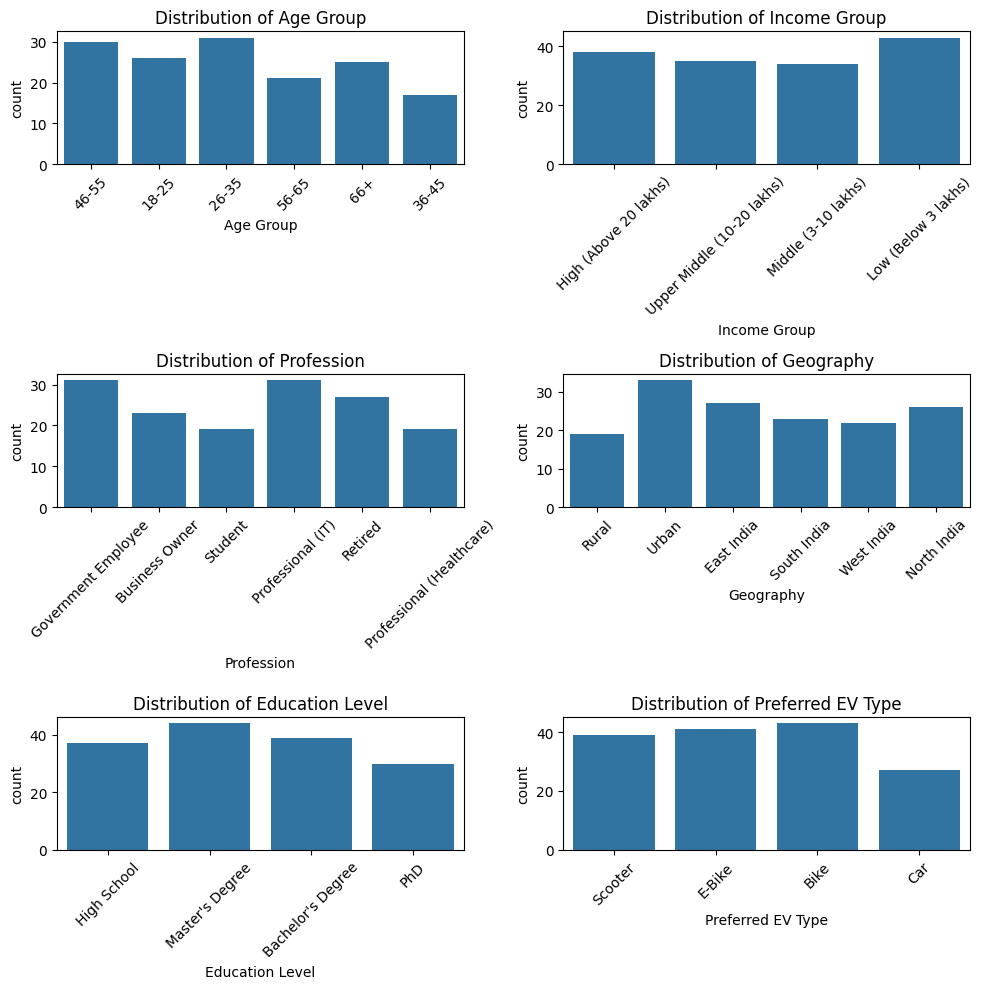

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))

for i, col in enumerate(cat_cols):
  sns.countplot(data=df, x=col, ax=axs[i//2, i%2])
  axs[i//2, i%2].set_title(f'Distribution of {col}')
  axs[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

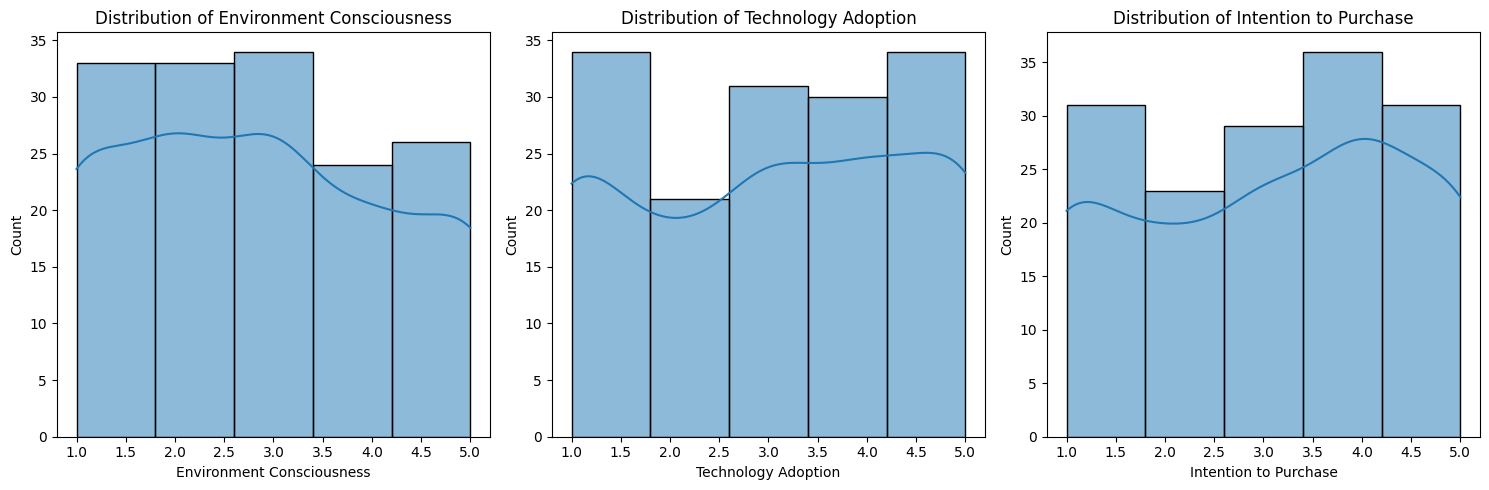

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

num_cols = ['Environment Consciousness', 'Technology Adoption', 'Intention to Purchase']

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i], bins=5)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

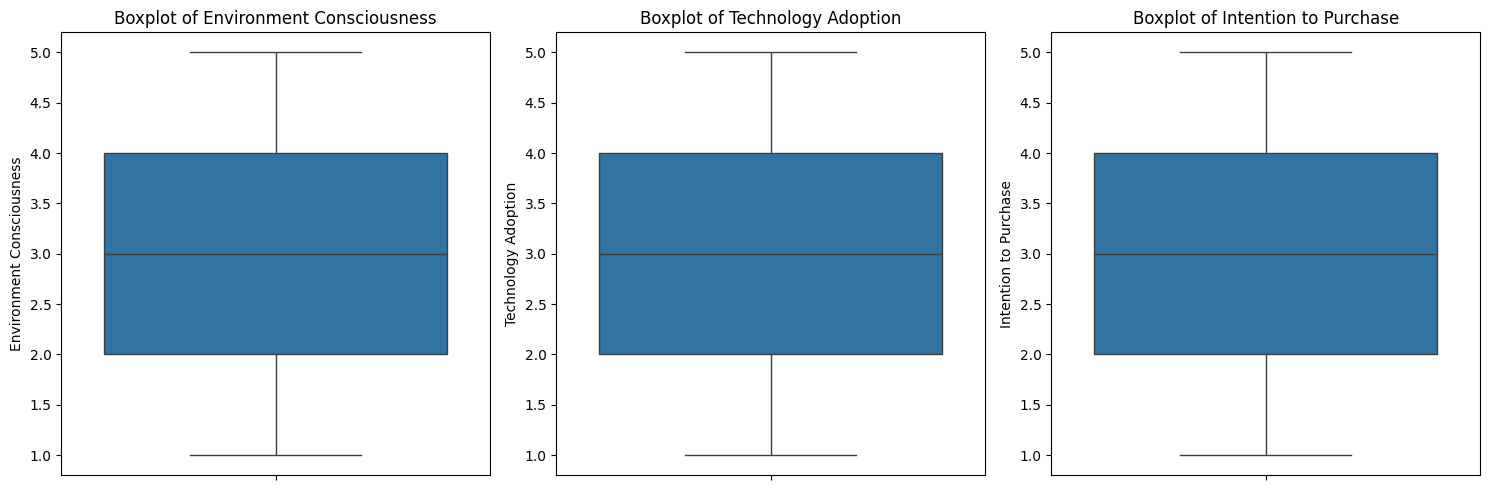

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
features = ['Age Group', 'Income Group', 'Profession', 'Geography', 'Education Level',
            'Preferred EV Type', 'Environment Consciousness', 'Technology Adoption', 'Intention to Purchase']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
categorical_features = df[['Age Group', 'Income Group', 'Profession', 'Geography', 'Education Level', 'Preferred EV Type']]
encoded_features = encoder.fit_transform(categorical_features)

In [ ]:
scaler = StandardScaler()
numerical_features = df[['Environment Consciousness', 'Technology Adoption', 'Intention to Purchase']]
scaled_numerical = scaler.fit_transform(numerical_features)

In [ ]:
x = pd.concat([pd.DataFrame(encoded_features), pd.DataFrame(scaled_numerical)], axis=1)

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,0,1,2
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.110377,-0.040922,-1.461261
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.329321,-1.404995,-1.461261
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.830226,-0.722959,-0.060691
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.110377,-0.040922,0.639594
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.329321,-1.404995,0.639594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.609472,-1.404995,0.639594
146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.329321,-1.404995,1.339879
147,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.110377,-0.722959,-0.760976
148,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.609472,-0.722959,-1.461261


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Segment'] = kmeans.fit_predict(x)

In [ ]:
df[['Customer ID', 'Segment']].head()

,Customer ID,Segment
0,CUST001,4
1,CUST002,4
2,CUST003,1
3,CUST004,0
4,CUST005,2


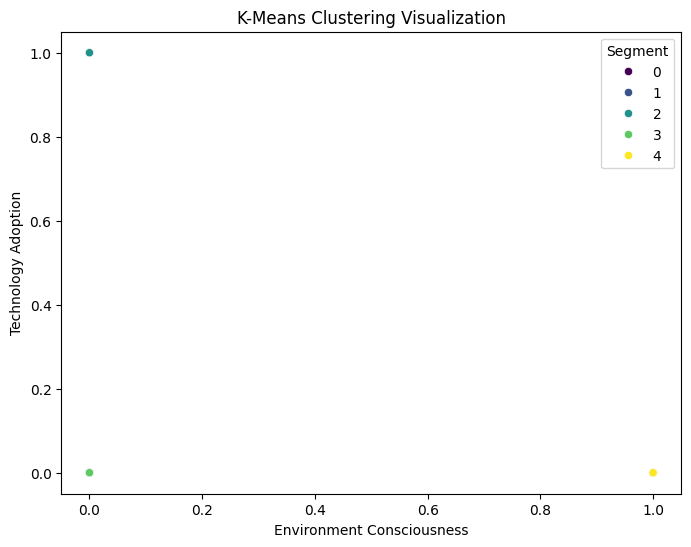

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[7], y=x[8], hue=df['Segment'], palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Environment Consciousness')
plt.ylabel('Technology Adoption')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

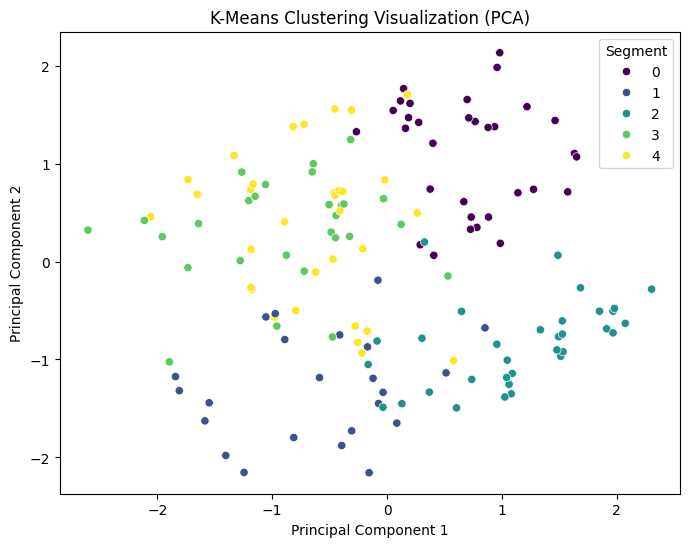

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principalDf['principal component 1'], y=principalDf['principal component 2'], hue=df['Segment'], palette='viridis')
plt.title('K-Means Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

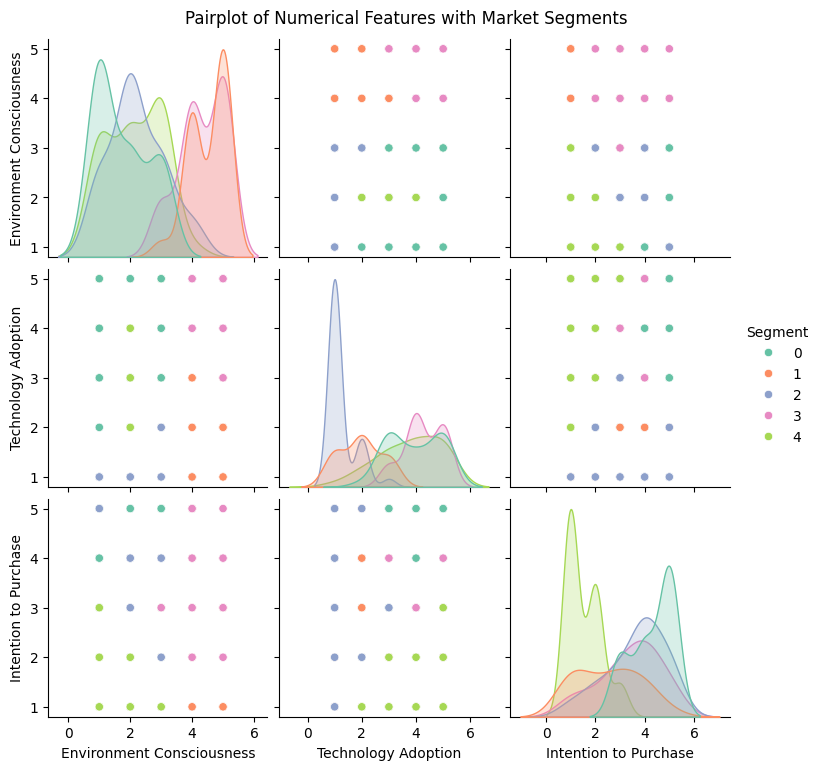

In [ ]:
sns.pairplot(df, vars=['Environment Consciousness', 'Technology Adoption', 'Intention to Purchase'], hue='Segment', palette='Set2')

plt.suptitle('Pairplot of Numerical Features with Market Segments', y=1.02)
plt.show()

In [ ]:
num_mean = df.groupby('Segment')[num_cols].mean()
num_std = df.groupby('Segment')[num_cols].std()

print(num_mean)
print(num_std)

         Environment Consciousness  Technology Adoption  Intention to Purchase
Segment                                                                       
0                         1.750000             3.937500               4.312500
1                         4.521739             1.956522               2.521739
2                         2.212121             1.242424               3.636364
3                         4.321429             4.250000               3.392857
4                         2.147059             3.764706               1.529412
         Environment Consciousness  Technology Adoption  Intention to Purchase
Segment                                                                       
0                         0.842424             0.948258               0.820602
1                         0.593109             0.767420               1.274561
2                         0.892944             0.501890               1.167748
3                         0.722832             0.700

In [ ]:
cat_mode = df.groupby('Segment')[cat_cols].agg(lambda x: x.value_counts().index[0])
print(cat_mode)

        Age Group                Income Group           Profession  \
Segment                                                              
0           26-35       High (Above 20 lakhs)  Government Employee   
1           26-35         Low (Below 3 lakhs)  Government Employee   
2             66+         Low (Below 3 lakhs)              Student   
3           46-55       High (Above 20 lakhs)              Retired   
4           18-25  Upper Middle (10-20 lakhs)  Government Employee   

           Geography    Education Level Preferred EV Type  
Segment                                                    
0        North India  Bachelor's Degree              Bike  
1              Urban  Bachelor's Degree              Bike  
2              Urban    Master's Degree               Car  
3        South India    Master's Degree           Scooter  
4        North India    Master's Degree            E-Bike  
